# **EE4802/IE4213 Exam Question 3**

This Colab notebook should perform handwritten digit image classification using a convolutional neural network (CNN).

Use the TensorFlow package which contains the Keras sub-package to implement the CNN. The dataset is the MNIST dataset found within Keras.
Import the necessary packages.

In [1]:
from numpy import max
from matplotlib import pyplot
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [2]:
## Load train and test dataset
# load dataset
(trainX, trainY), (testX, testY) = mnist.load_data()
# reshape dataset to have a single channel
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))
# one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
## Prepare (convert integers to floats) and scale pixels (so that range is [0,1]) in the input images
# convert from integers to floats
trainX_norm = trainX.astype('float32')
testX_norm = testX.astype('float32')
# normalize to range 0-1
trainX = trainX_norm / 255.0
testX = testX_norm / 255.0

In [4]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [5]:
## Define CNN model
model = Sequential(
    [
        Conv2D(16, 5, activation="relu", input_shape=(28, 28, 1)),
        MaxPooling2D(
            pool_size=(2, 2),
            strides=(2, 2),
        ),
        Conv2D(12, 3, activation="relu"),
        MaxPooling2D(
            pool_size=(2, 2),
            strides=(2, 2),
        ),
        Flatten(),  # too many dimensions after Conv2D
        Dense(20, activation="relu"),
        # Keras documentation: often used for last layer because result can be interpreted as
        # a probability distribution
        Dense(10, activation="softmax"),
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 12)        1740      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 12)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 300)               0         
                                                                 
 dense (Dense)               (None, 20)                6

In [6]:
# Train the CNN model
model.compile(
    optimizer='adam',  # newest ADAM
    loss='categorical_crossentropy',  # multi-class labeling
    metrics=['accuracy'],
)
history = model.fit(trainX, trainY, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 7s 2ms/step - loss: 0.2523 - accuracy: 0.9233
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0837 - accuracy: 0.9747
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0635 - accuracy: 0.9808
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0519 - accuracy: 0.9843
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0447 - accuracy: 0.9866
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0393 - accuracy: 0.9878
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0337 - accuracy: 0.9896
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0306 - accuracy: 0.9906
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0268 - accuracy: 0.9916
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.025

In [7]:
# Evaluate the CNN model
_, acc = model.evaluate(testX, testY)
print('Accuracy : %.3f' % (acc * 100.0))

313/313 [==============================] - 1s 2ms/step - loss: 0.0289 - accuracy: 0.9912
Accuracy : 99.120


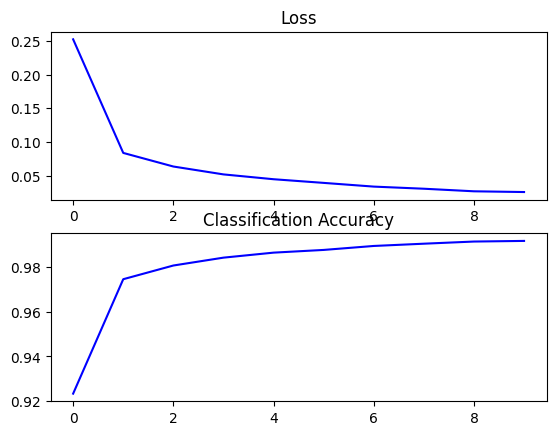

In [8]:
# Plot performance graphs
# plot loss
pyplot.subplot(2, 1, 1)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
# plot accuracy
pyplot.subplot(2, 1, 2)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.show()